<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/cnn/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime

In [42]:
import tensorflow as tf
from os import path, getcwd, chdir
path = f"{getcwd()}/mnist.npz"
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

time: 1.37 ms


In [45]:
# def train_mnist_conv():  
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
      if logs.get('accuracy')>=0.998:
          self.model.stop_training = True

callbacks = Mycallback() 

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.


time: 367 ms


In [64]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.35),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    training_images,training_labels,validation_split = 0.2,epochs=15 ,callbacks =[callbacks]
)
print(model.evaluate(test_images, test_labels))
# return history.epoch, history.history['accuracy'][-1]
%load_ext autotime

Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3845 - accuracy: 0.8769 - val_loss: 0.1001 - val_accuracy: 0.9723
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1359 - accuracy: 0.9587 - val_loss: 0.0862 - val_accuracy: 0.9753
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1086 - accuracy: 0.9664 - val_loss: 0.0640 - val_accuracy: 0.9826
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0935 - accuracy: 0.9714 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 5/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9738 - val_loss: 0.0595 - val_accuracy: 0.9815
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0771 - accuracy: 0.9759 - val_loss: 0.0529 - val_accuracy: 0.9843
Epoch 7/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9760 - val_loss: 0.0446 - val_accuracy:

In [65]:
test_history = model.evaluate(x=test_images,y=test_labels )
%load_ext autotime

313/313 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9896
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 735 ms


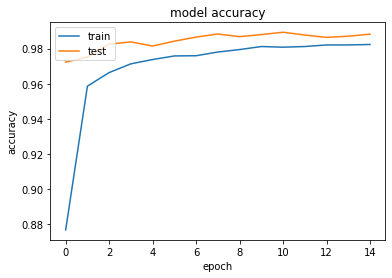

time: 141 ms


In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)              